# Определение перспективного тарифа для телеком-компании
### Цель исследования: проанализировать тарифы, чтобы  выгодно скорректировать рекламный бюджет

1. Опишите поведение клиентов оператора, исходя из выборки
2. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
   Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.
- **Посчитайте для каждого пользователя:**
1. количество сделанных звонков и израсходованных минут разговора по месяцам;
2. количество отправленных сообщений по месяцам;
3. объем израсходованного интернет-трафика по месяцам;
4. помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

- **Проверьте гипотезы:**
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.









## Описание данных
- В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год
- **Описание тарифов**
1. `Тариф «Смарт»`
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей
2. `Тариф «Ультра»`
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
   - минута разговора: 1 рубль
   - сообщение: 1 рубль
   - 1 Гб интернет-трафика: 150 рублей

`Примечание` <a id='note'></a>
- «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 
- Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
- Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. 
- Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. 
- Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [1]:
#импортируем нужные библиотеки для работы с данными
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy import stats as st
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#путь на сервер
server_calls = '/datasets/calls.csv'
server_internet = '/datasets/internet.csv'
server_messages = '/datasets/messages.csv'
server_tariffs = '/datasets/tariffs.csv'
server_users = '/datasets/users.csv'
#локальный путь
local_calls = 'calls.csv'
local_internet = 'internet.csv'
local_messages = 'messages.csv'
local_tariffs = 'tariffs.csv'
local_users = 'users.csv'
#попробуем загрузить данные с сервера, если не получится загрузим с локального хранилища
try:
    calls = pd.read_csv(server_calls)
    internet = pd.read_csv(server_internet)
    messages = pd.read_csv(server_messages)
    tariffs = pd.read_csv(server_tariffs)
    users = pd.read_csv(server_users)
except: 
    calls = pd.read_csv(local_calls)
    internet = pd.read_csv(local_internet)
    messages = pd.read_csv(local_messages)
    tariffs = pd.read_csv(local_tariffs)
    users = pd.read_csv(local_users)

# 1. Знакомство с данными & Предобработка

- **Таблица calls**

In [3]:
#таблица информация о звонках
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
#посмотрим первые 5 строк
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
#размер таблицы(строки,столбцы)
calls.shape

(202607, 4)

In [6]:
#описательная статистика
calls.describe()

,duration,user_id
count,202607.00,202607.00
mean,6.76,1253.94
std,5.84,144.72
min,0.00,1000.00
25%,1.30,1126.00
50%,6.00,1260.00
75%,10.70,1379.00
max,38.00,1499.00


In [7]:
#посмотрим на столбцы
calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [8]:
#посчитаем пропущенные значения 
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [9]:
#посчитаем дубликаты
calls.duplicated().sum()

0

- Названия столбцов соответствуют хорошему стилю, сделаем преобразования столбец call_date в формат datetime и [длительность округлим до целых значений в большую сторону](#note)

In [10]:
#столбец дата в формат datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
#столбец длительность округлим к большему и приведем к целочисленному типу
calls['duration'] = np.ceil(calls['duration']).astype('int') 

In [11]:
#проверим
calls, calls.dtypes

(              id  call_date  duration  user_id
 0         1000_0 2018-07-25         0     1000
 1         1000_1 2018-08-17         0     1000
 2         1000_2 2018-06-11         3     1000
 3         1000_3 2018-09-21        14     1000
 4         1000_4 2018-12-15         6     1000
 ...          ...        ...       ...      ...
 202602  1499_215 2018-12-26         1     1499
 202603  1499_216 2018-10-18        19     1499
 202604  1499_217 2018-11-10        11     1499
 202605  1499_218 2018-10-06         5     1499
 202606  1499_219 2018-12-14        20     1499
 
 [202607 rows x 4 columns],
 id                   object
 call_date    datetime64[ns]
 duration              int32
 user_id               int64
 dtype: object)

- **Таблица internet**

In [12]:
#посмотрим на таблицу
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [13]:
#таблица информация о таблице
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [14]:
#размер таблицы(строки,столбцы)
internet.shape

(149396, 5)

In [15]:
#описательная статистика
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.00,149396.00,149396.00
mean,74697.50,370.19,1252.10
std,43127.05,278.30,144.05
min,0.00,0.00,1000.00
25%,37348.75,138.19,1130.00
50%,74697.50,348.01,1251.00
75%,112046.25,559.55,1380.00
max,149395.00,1724.83,1499.00


In [16]:
#названия столбцов
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [17]:
#посчитаем пропущенные значения
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [18]:
#посчитаем дубликаты
internet.duplicated().sum()

0

In [19]:
#посмотрим на столбец
internet['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64

In [20]:
#15 случайных значений
internet['Unnamed: 0'].sample(n=15)

67908      67908
14090      14090
55262      55262
97546      97546
31080      31080
65786      65786
46190      46190
127877    127877
18714      18714
129312    129312
135475    135475
83459      83459
132307    132307
88561      88561
79899      79899
Name: Unnamed: 0, dtype: int64

- Названия столбцов соответствуют хорошему стилю, сделаем преобразования столбец session_date в формат datetime, удалим столбец 'Unnamed: 0' так как он просто дублирует индекс и [mb_used округлим до целых значений в большую сторону](#note)

In [21]:
#столбец в формат datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")
#столбец использованных мб округлим к большему и приведем к целочисленному типу
internet['mb_used'] = internet['mb_used'].astype('int')
#удалим столбец, удалим старые индексы и создадим новые
internet = internet.drop(labels = 'Unnamed: 0', axis = 1).reset_index(drop=True)

In [22]:
#проверим
internet, internet.dtypes

(              id  mb_used session_date  user_id
 0         1000_0      112   2018-11-25     1000
 1         1000_1     1052   2018-09-07     1000
 2         1000_2     1197   2018-06-25     1000
 3         1000_3      550   2018-08-22     1000
 4         1000_4      302   2018-09-24     1000
 ...          ...      ...          ...      ...
 149391  1499_152      318   2018-10-03     1499
 149392  1499_153      490   2018-12-14     1499
 149393  1499_154        0   2018-10-27     1499
 149394  1499_155     1246   2018-11-26     1499
 149395  1499_156      544   2018-10-26     1499
 
 [149396 rows x 4 columns],
 id                      object
 mb_used                  int32
 session_date    datetime64[ns]
 user_id                  int64
 dtype: object)

- **Таблица messages**

In [23]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [24]:
#
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [25]:
#размер таблицы
messages.shape

(123036, 3)

In [26]:
#описательная статистика
messages.describe()

,user_id
count,123036.00
mean,1256.99
std,143.52
min,1000.00
25%,1134.00
50%,1271.00
75%,1381.00
max,1499.00


In [27]:
#посмотрим на столбцы
messages.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

In [28]:
#посчитаем пропущенные значения
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [29]:
#посчитаем дубликаты
messages.duplicated().sum()

0

- Названия столбцов соответствуют хорошему стилю, сделаем преобразования столбец message_date в формат datetime

In [30]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [31]:
#проверим
messages.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

- **Таблица tariffs**

In [32]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [33]:
#посмотрим на столбцы
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

- Тут всё в порядке предлагаю двигаться дальше

- **Таблица users**

In [34]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [35]:
#общая информация о таблице
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [36]:
#общая размер таблицы
users.shape

(500, 8)

In [37]:
#описательная статистика
users.describe()

,user_id,age
count,500.00,500.00
mean,1249.50,46.59
std,144.48,16.67
min,1000.00,18.00
25%,1124.75,32.00
50%,1249.50,46.00
75%,1374.25,62.00
max,1499.00,75.00


In [38]:
#описательная статистика
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [39]:
#посчитаем пропуски
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [40]:
#посчитаем дубликаты
users.duplicated().sum()

0

In [41]:
#сделаем преобразования столбец churn_date и reg_date в формат datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [42]:
#проверим
users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

In [43]:
#уникальные значения столбца
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [44]:
#уникальные значения столбца
users['first_name'].unique()

array(['Рафаил', 'Иван', 'Евгений', 'Белла', 'Татьяна', 'Афанасий',
       'Леонид', 'Юна', 'Рустэм', 'Василиса', 'Эдуард', 'Веселина',
       'Варлам', 'Борис', 'Яков', 'Рузана', 'Марица', 'Мария', 'Матвей',
       'Игнатий', 'Тала', 'Святослав', 'Людмила', 'Иулиан', 'Владислав',
       'Рустем', 'Алексей', 'Мариетта', 'Лаврентий', 'Инна', 'Лия',
       'Розалия', 'Анжелика', 'Изольда', 'Агнесса', 'Юрий', 'Михаил',
       'Константин', 'Марианна', 'Иннокентий', 'Джемма', 'Екатерина',
       'Милица', 'Лола', 'Габриель', 'Кристина', 'Павел', 'Ренальд',
       'Луиза', 'Радислав', 'Динара', 'Лукий', 'Глеб', 'Тамара',
       'Александр', 'Таира', 'Роза', 'Исак', 'Юзефа', 'Ким', 'Гордей',
       'Эльза', 'Гектор', 'Андрей', 'Рафаэль', 'Фёдор', 'Харитон',
       'Еремей', 'Всеволод', 'Софья', 'Авксентий', 'Виолетта', 'Ириней',
       'Гелена', 'Ксения', 'Вера', 'Вениамин', 'Вероника', 'Даниэла',
       'Алла', 'Элеонора', 'Аюна', 'Руслан', 'Онисим', 'Марта', 'Эльвира',
       'Габриэль', '

In [45]:
#уникальные значения столбца
users['last_name'].unique()

array(['Верещагин', 'Ежов', 'Абрамович', 'Белякова', 'Авдеенко', 'Горлов',
       'Ермолаев', 'Березина', 'Пономарёв', 'Блинова', 'Кононов',
       'Алёшко', 'Соловьев', 'Андреенко', 'Акинфьев', 'Алюшина',
       'Сазонова', 'Аленникова', 'Золотов', 'Круглов', 'Костина',
       'Тихонов', 'Трофимова', 'Мельникова', 'Антипов', 'Акинин',
       'Бородин', 'Авдеев', 'Евсеев', 'Селезнев', 'Русанова', 'Тимофеев',
       'Игнатьева', 'Бабушкина', 'Бондарев', 'Аракина', 'Андропова',
       'Архипова', 'Денисова', 'Одинцов', 'Кравцов', 'Добрынин',
       'Родионова', 'Рябов', 'Карасева', 'Александрова', 'Меркулова',
       'Мясникова', 'Ларин', 'Аничкина', 'Сомова', 'Панов', 'Фёдоров',
       'Платонова', 'Артемьев', 'Дьячкова', 'Глушков', 'Свиридов',
       'Рудаков', 'Ситникова', 'Коршунов', 'Климова', 'Алфеева',
       'Игнатова', 'Малахов', 'Абашкина', 'Демьянов', 'Кочетов',
       'Селиванова', 'Чумаков', 'Андрейкин', 'Павловский', 'Никулин',
       'Шарапов', 'Кольцова', 'Литвинов', 'Авр

In [46]:
#уникальные значения столбца
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

### Вывод:
- Данные изучили, преобразовали, привели к нужным типам, можем двигаться дальше

# 2. Подготовка данных
- **Посчитайте для каждого пользователя:**
1. количество сделанных звонков и израсходованных минут разговора по месяцам;
2. количество отправленных сообщений по месяцам;
3. объем израсходованного интернет-трафика по месяцам;
4. помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [47]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


In [48]:
#добавим столбцы месяц и день
calls['month'] = calls['call_date'].dt.month
calls['day'] = calls['call_date'].dt.day

In [49]:
#проверим
calls

,id,call_date,duration,user_id,month,day
0,1000_0,2018-07-25,0,1000,7,25
1,1000_1,2018-08-17,0,1000,8,17
2,1000_2,2018-06-11,3,1000,6,11
3,1000_3,2018-09-21,14,1000,9,21
4,1000_4,2018-12-15,6,1000,12,15
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12,26
202603,1499_216,2018-10-18,19,1499,10,18
202604,1499_217,2018-11-10,11,1499,11,10
202605,1499_218,2018-10-06,5,1499,10,6


## 2.1 Посчитайте количество сделанных звонков и израсходованных минут разговора по месяцам

In [50]:
#создадим сводную таблицу где индексом будет месяц, а значением кол-во звонков и длительность звонков за месяц
u_calls_month = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count', 'sum'])
u_calls_month.columns= ['count_duration', 'sum_duration']
u_calls_month

count_duration  sum_duration
user_id month                              
1000    5                  22           159
        6                  43           172
        7                  47           340
        8                  52           408
        9                  58           466
...                       ...           ...
1498    10                 41           247
1499    9                   9            70
        10                 68           449
        11                 74           612
        12                 69           492

[3174 rows x 2 columns]

## 2.2 Посчитайте количество количество отправленных сообщений по месяцам

In [51]:
#добавим в таблицу столбец с месяцем
messages['month'] = messages['message_date'].dt.month

In [52]:
#проверим
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [53]:
#создадим сводную таблицу, где индексом будет месяц, значением кол-во сообщений за месяц
sum_mess_month = messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
sum_mess_month.columns= ['count_messages']
#проверим
sum_mess_month

count_messages
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

## 2.3 Посчитайте объем израсходованного интернет-трафика по месяцам

In [54]:
#добавим в таблицу столбец с месяцем
internet['month'] = internet['session_date'].dt.month

In [55]:
#проверим
internet

,id,mb_used,session_date,user_id,month
0,1000_0,112,2018-11-25,1000,11
1,1000_1,1052,2018-09-07,1000,9
2,1000_2,1197,2018-06-25,1000,6
3,1000_3,550,2018-08-22,1000,8
4,1000_4,302,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318,2018-10-03,1499,10
149392,1499_153,490,2018-12-14,1499,12
149393,1499_154,0,2018-10-27,1499,10
149394,1499_155,1246,2018-11-26,1499,11


In [56]:
#создадим сводную таблицу, где индексом будет месяц, значением кол-во сообщений за месяц
sum_inter_month = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
sum_inter_month.columns= ['mb_sum']
#проверим
sum_inter_month

mb_sum
user_id month        
1000    5        2252
        6       23213
        7       13988
        8       14043
        9       14556
...               ...
1498    10      20555
1499    9        1844
        10      17766
        11      17945
        12      13037

[3203 rows x 1 columns]

## 2.3 Посчитайте помесячную выручку с каждого пользователя

In [57]:
#объеденим агрегированные данные в одну таблицу
df = u_calls_month.merge(sum_mess_month, on=['user_id','month'], how='outer')

In [58]:
df

count_duration  sum_duration  count_messages
user_id month                                              
1000    5               22.00        159.00           22.00
        6               43.00        172.00           60.00
        7               47.00        340.00           75.00
        8               52.00        408.00           81.00
        9               58.00        466.00           57.00
...                       ...           ...             ...
1489    8                 NaN           NaN           17.00
        9                 NaN           NaN           32.00
        10                NaN           NaN           21.00
        11                NaN           NaN           20.00
        12                NaN           NaN           35.00

[3213 rows x 3 columns]

In [59]:
#объеденим агрегированные данные в одну таблицу
df = df.merge(sum_inter_month, on=['user_id','month'], how='outer')

In [60]:
#проверим
df

count_duration  sum_duration  count_messages   mb_sum
user_id month                                                       
1000    5               22.00        159.00           22.00  2252.00
        6               43.00        172.00           60.00 23213.00
        7               47.00        340.00           75.00 13988.00
        8               52.00        408.00           81.00 14043.00
        9               58.00        466.00           57.00 14556.00
...                       ...           ...             ...      ...
1489    9                 NaN           NaN           32.00 17183.00
        10                NaN           NaN           21.00 19538.00
        11                NaN           NaN           20.00 17471.00
        12                NaN           NaN           35.00 17298.00
1476    4                 NaN           NaN             NaN   530.00

[3214 rows x 4 columns]

In [61]:
#объеденим агрегированные данные в одну таблицу
df = df.merge(users, on='user_id', how='left')

In [62]:
#проверим
df

,user_id,count_duration,sum_duration,count_messages,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,22.00,159.00,22.00,2252.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,43.00,172.00,60.00,23213.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,47.00,340.00,75.00,13988.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,52.00,408.00,81.00,14043.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,58.00,466.00,57.00,14556.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,NaN,NaN,32.00,17183.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,NaN,NaN,21.00,19538.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,NaN,NaN,20.00,17471.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,NaN,NaN,35.00,17298.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


In [63]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [64]:
#переименуем столбец, чтобы объеденить по нему
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [65]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [66]:
#объеденим агрегированные данные в одну таблицу
df = df.merge(tariffs, on='tariff', how='left')

In [67]:
#проверим
df

,user_id,count_duration,sum_duration,count_messages,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,22.00,159.00,22.00,2252.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,43.00,172.00,60.00,23213.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,47.00,340.00,75.00,13988.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,52.00,408.00,81.00,14043.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,58.00,466.00,57.00,14556.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,NaN,NaN,32.00,17183.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,NaN,NaN,21.00,19538.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,NaN,NaN,20.00,17471.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,NaN,NaN,35.00,17298.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [68]:
#посчитаем пропущенные значения
df.isna().sum()

user_id                     0
count_duration             40
sum_duration               40
count_messages            497
mb_sum                     11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [69]:
#заменим пропущенные значения в данных столбцах
df['count_duration'] = df['count_duration'].fillna(0)
df['sum_duration'] = df['sum_duration'].fillna(0)
df['count_messages'] = df['count_messages'].fillna(0)
df['mb_sum'] = df['mb_sum'].fillna(0)

In [70]:
#проверим
df.isna().sum()

user_id                     0
count_duration              0
sum_duration                0
count_messages              0
mb_sum                      0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

- напомню что churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

In [71]:
#посчитаем дубликаты
df.duplicated().sum()

0

In [72]:
df

,user_id,count_duration,sum_duration,count_messages,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,22.00,159.00,22.00,2252.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,43.00,172.00,60.00,23213.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,47.00,340.00,75.00,13988.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,52.00,408.00,81.00,14043.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,58.00,466.00,57.00,14556.00,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,0.00,0.00,32.00,17183.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,0.00,0.00,21.00,19538.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,0.00,0.00,20.00,17471.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,0.00,0.00,35.00,17298.00,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [73]:
#посчитаем доходы для оператора, найдем разницу между использованными и включенными в тариф услугами
df['above_sms'] = df['count_messages'] - df['messages_included']
df['above_min'] = df['sum_duration'] - df['minutes_included']
df['above_mbs'] = df['mb_sum'] - df['mb_per_month_included']

In [74]:
#проверим
df

,user_id,count_duration,sum_duration,count_messages,mb_sum,age,churn_date,city,first_name,last_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_sms,above_min,above_mbs
0,1000,22.00,159.00,22.00,2252.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-978.00,-2841.00,-28468.00
1,1000,43.00,172.00,60.00,23213.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-940.00,-2828.00,-7507.00
2,1000,47.00,340.00,75.00,13988.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-925.00,-2660.00,-16732.00
3,1000,52.00,408.00,81.00,14043.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-919.00,-2592.00,-16677.00
4,1000,58.00,466.00,57.00,14556.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-943.00,-2534.00,-16164.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,0.00,0.00,32.00,17183.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,50,15360,500,550,200,3,3,-18.00,-500.00,1823.00
3210,1489,0.00,0.00,21.00,19538.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,50,15360,500,550,200,3,3,-29.00,-500.00,4178.00
3211,1489,0.00,0.00,20.00,17471.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,50,15360,500,550,200,3,3,-30.00,-500.00,2111.00
3212,1489,0.00,0.00,35.00,17298.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,50,15360,500,550,200,3,3,-15.00,-500.00,1938.00


In [75]:
#функции для одной строк если пользователь использовал доп услуги умножим их на стоимость этой услуги
def sms(row):
    if row['above_sms'] > 0:
        return row['above_sms'] * row['rub_per_message']
    else:
        return 0


def mbs(row):
    if row['above_mbs'] > 0:
        return (np.ceil(row['above_mbs']/1024)).astype('int') * row['rub_per_gb']
    else:
        return 0


def minutes(row):
    if row['above_min'] > 0:
        return row['above_min'] * row['rub_per_minute']
    else:
        return 0

In [76]:
#доход по каждой услуге
df['income_sms'] = df.apply(sms, axis=1)
df['income_mbs'] = df.apply(mbs, axis=1)
df['income_min'] = df.apply(minutes, axis=1)

In [77]:
#проверим
df

,user_id,count_duration,sum_duration,count_messages,mb_sum,age,churn_date,city,first_name,last_name,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_sms,above_min,above_mbs,income_sms,income_mbs,income_min
0,1000,22.00,159.00,22.00,2252.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1950,150,1,1,-978.00,-2841.00,-28468.00,0.00,0,0.00
1,1000,43.00,172.00,60.00,23213.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1950,150,1,1,-940.00,-2828.00,-7507.00,0.00,0,0.00
2,1000,47.00,340.00,75.00,13988.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1950,150,1,1,-925.00,-2660.00,-16732.00,0.00,0,0.00
3,1000,52.00,408.00,81.00,14043.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1950,150,1,1,-919.00,-2592.00,-16677.00,0.00,0,0.00
4,1000,58.00,466.00,57.00,14556.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1950,150,1,1,-943.00,-2534.00,-16164.00,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,0.00,0.00,32.00,17183.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,-18.00,-500.00,1823.00,0.00,400,0.00
3210,1489,0.00,0.00,21.00,19538.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,-29.00,-500.00,4178.00,0.00,1000,0.00
3211,1489,0.00,0.00,20.00,17471.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,-30.00,-500.00,2111.00,0.00,600,0.00
3212,1489,0.00,0.00,35.00,17298.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,-15.00,-500.00,1938.00,0.00,400,0.00


In [78]:
#посчитаем общий доход
df['total'] = df['income_sms'] + df['income_mbs'] + df['income_min'] + df['rub_monthly_fee']

In [79]:
#проверим
df

,user_id,count_duration,sum_duration,count_messages,mb_sum,age,churn_date,city,first_name,last_name,...,rub_per_gb,rub_per_message,rub_per_minute,above_sms,above_min,above_mbs,income_sms,income_mbs,income_min,total
0,1000,22.00,159.00,22.00,2252.00,52,NaT,Краснодар,Рафаил,Верещагин,...,150,1,1,-978.00,-2841.00,-28468.00,0.00,0,0.00,1950.00
1,1000,43.00,172.00,60.00,23213.00,52,NaT,Краснодар,Рафаил,Верещагин,...,150,1,1,-940.00,-2828.00,-7507.00,0.00,0,0.00,1950.00
2,1000,47.00,340.00,75.00,13988.00,52,NaT,Краснодар,Рафаил,Верещагин,...,150,1,1,-925.00,-2660.00,-16732.00,0.00,0,0.00,1950.00
3,1000,52.00,408.00,81.00,14043.00,52,NaT,Краснодар,Рафаил,Верещагин,...,150,1,1,-919.00,-2592.00,-16677.00,0.00,0,0.00,1950.00
4,1000,58.00,466.00,57.00,14556.00,52,NaT,Краснодар,Рафаил,Верещагин,...,150,1,1,-943.00,-2534.00,-16164.00,0.00,0,0.00,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,0.00,0.00,32.00,17183.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,200,3,3,-18.00,-500.00,1823.00,0.00,400,0.00,950.00
3210,1489,0.00,0.00,21.00,19538.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,200,3,3,-29.00,-500.00,4178.00,0.00,1000,0.00,1550.00
3211,1489,0.00,0.00,20.00,17471.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,200,3,3,-30.00,-500.00,2111.00,0.00,600,0.00,1150.00
3212,1489,0.00,0.00,35.00,17298.00,35,NaT,Санкт-Петербург,Павел,Гончаров,...,200,3,3,-15.00,-500.00,1938.00,0.00,400,0.00,950.00


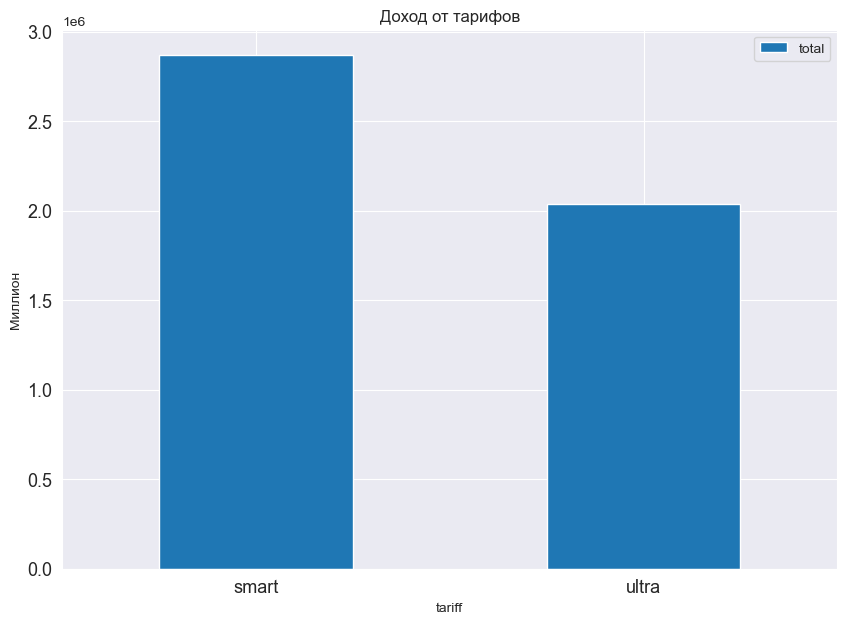

In [80]:
#посмотрим кто приносит больший доход
total = df.pivot_table(index='tariff', values='total', aggfunc='sum').plot(kind='bar',figsize=(10, 7),fontsize=13)
plt.title('Доход от тарифов')
plt.ylabel('Миллион')
plt.xticks(rotation = 0)
plt.ylim()
plt.show()

- За 2018 год тариф smart принес почти 3 млн.р, а тариф ultra 2 млн.р

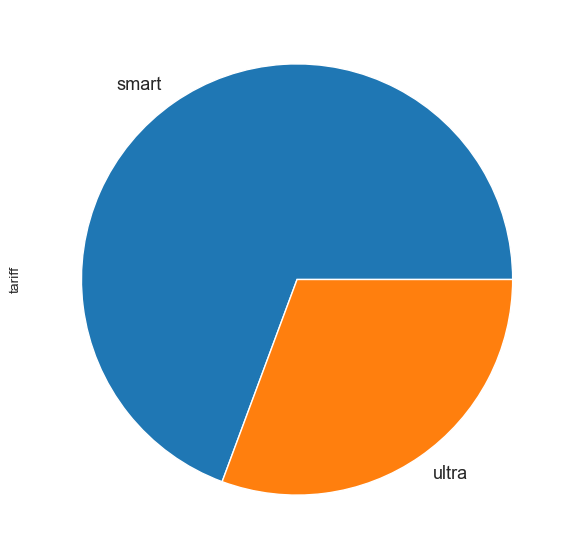

In [81]:
df['tariff'].value_counts().plot(kind='pie', figsize=(10, 7),fontsize=13);

- Как видно из графика тарифом smart пользуются больше людей чем тарифом ultra

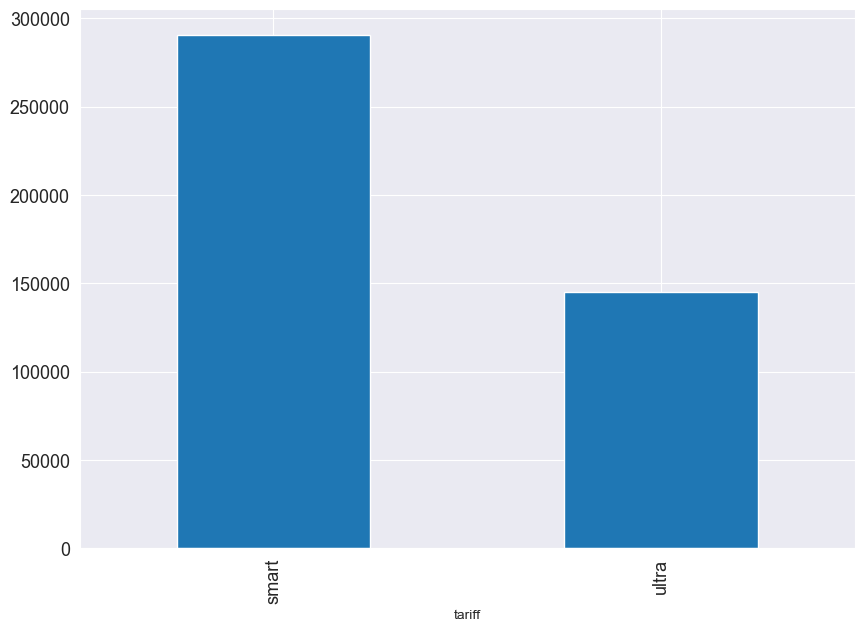

In [82]:
#лучайным образом отобрать людей чтобы проверить действительно ли тариф смарт приносит больше
import random 
ultra1 = random.sample(list(df['tariff'].index), 300)
df.loc[ultra1].groupby('tariff')['total'].sum().plot(kind='bar', figsize=(10, 7),fontsize=13);

## 3. Проанализируйте данные
1. Опишите поведение клиентов оператора, исходя из выборки
2. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
3. Посчитайте среднее количество, дисперсию и стандартное отклонение
3. Постройте гистограммы
4. Опишите распределения.

In [83]:
#создадим 2 среза для тарифов
ultra = df.query('tariff == "ultra"')
smart = df.query('tariff == "smart"')

In [84]:
#проверим
ultra['tariff'].unique()

array(['ultra'], dtype=object)

In [85]:
#среднее и медиана для тарифа ultra
ultra['sum_duration'].mean(), ultra['sum_duration'].median()

(526.6233502538071, 518.0)

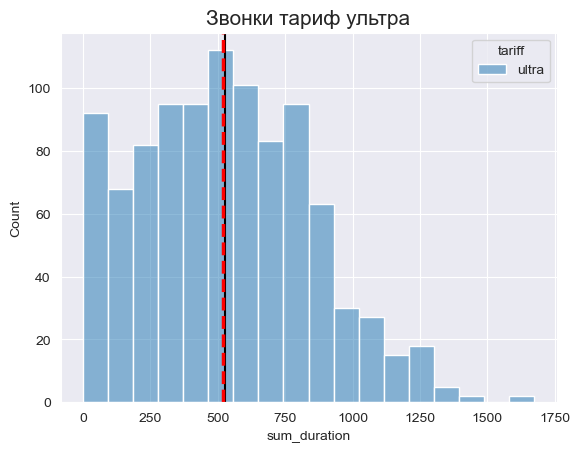

In [86]:
#посмотрим сколько разговаривает тариф ультра 
sns.histplot(data=ultra, x='sum_duration', hue='tariff', alpha=0.5)
plt.axvline(x=ultra['sum_duration'].mean(),color='black', lw=1.5)
plt.axvline(x=ultra['sum_duration'].median(),color='red',ls='--', lw=2.5)
plt.title('Звонки тариф ультра', fontsize=15)
plt.show()

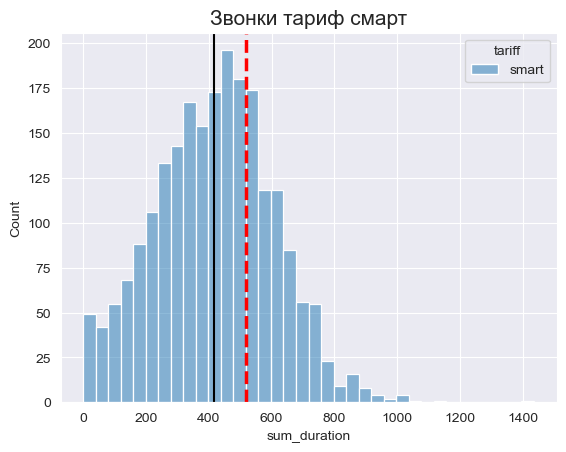

In [87]:
#посмотрим сколько разговаривает тариф смарт
sns.histplot(data=smart, x='sum_duration', hue='tariff', alpha=0.5)
plt.axvline(x=smart['sum_duration'].mean(),color='black', lw=1.5)
plt.axvline(x=ultra['sum_duration'].median(),color='red',ls='--', lw=2.5)
plt.title('Звонки тариф смарт', fontsize=15)
plt.show()

In [88]:
#среднее и медиана для тарифа ultra
smart['sum_duration'].mean(), smart['sum_duration'].median()

(417.9349484073576, 422.0)

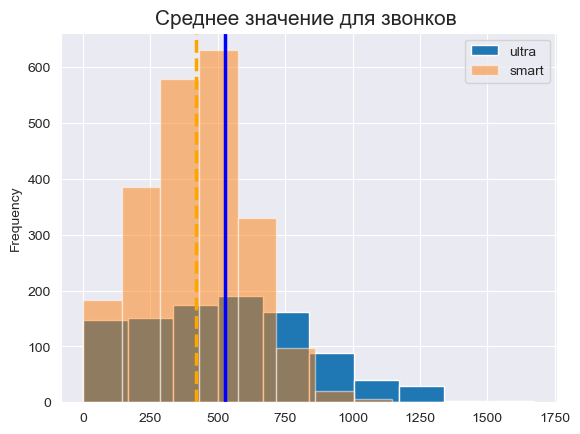

In [89]:
#посмотрим на средние для тарифов
ultra['sum_duration'].plot(kind='hist', legend=True, label="ultra")
plt.axvline(x=ultra['sum_duration'].mean(),color='blue',ls='-', lw=2.5)
smart['sum_duration'].plot(kind='hist',alpha=0.5, legend=True, label="smart")
plt.axvline(x=smart['sum_duration'].mean(),color='orange',ls='--', lw=2.5)
plt.title('Среднее значение для звонков ', fontsize=15)
plt.show()

**Вывод:**
1. Тариф Ультра - среднее и медиана рпактически на одном уровне, то есть за месяц в среднем люди наговаривают 520 минут, что входит в стоимость аббонентской платы
2. Тариф Смарт - среднее расположилось на 422, медиана на 450, то есть в среднем за месяц наговаривают 422 минуты, что входит в стоимость тарифа
- Пользователи тарифа Ультра в среднем разговаривают дольше пользователей тарифа Смарт

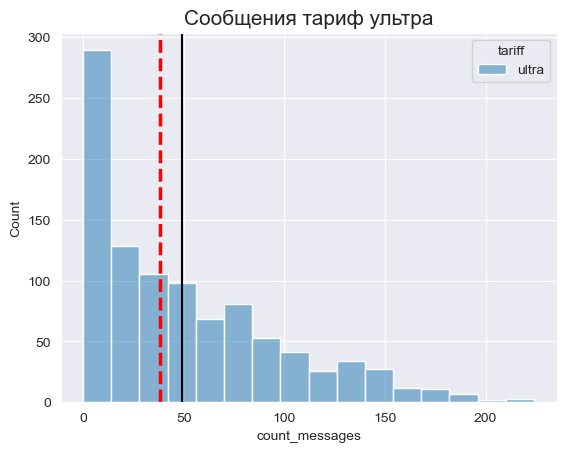

In [90]:
#посмотрим сколько сообщений использует тариф ультра 
sns.histplot(data=ultra, x='count_messages', hue='tariff', alpha=0.5)
plt.axvline(x=ultra['count_messages'].mean(),color='black', lw=1.5)
plt.axvline(x=ultra['count_messages'].median(),color='red',ls='--', lw=2.5)
plt.title('Сообщения тариф ультра', fontsize=15)
plt.show()

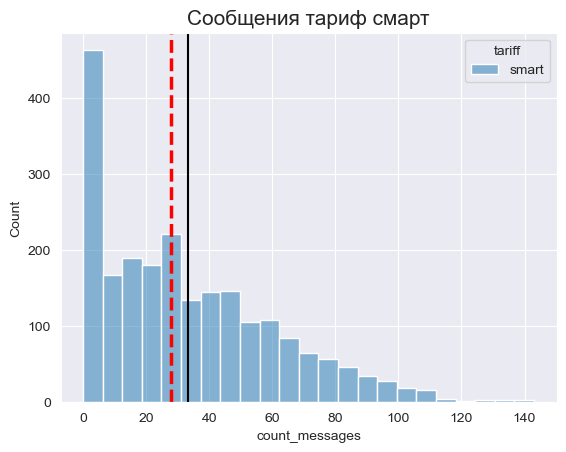

In [91]:
#посмотрим сколько сообщений использует тариф smart
sns.histplot(data=smart, x='count_messages', hue='tariff', alpha=0.5)
plt.axvline(x=smart['count_messages'].mean(),color='black', lw=1.5)
plt.axvline(x=smart['count_messages'].median(),color='red',ls='--', lw=2.5)
plt.title('Сообщения тариф смарт', fontsize=15)
plt.show()

**Вывод:**
1. Тариф Ультра - в среднем пользователи используют 50 смс, так же видно пик на нуле, это значит,что много людей,которые не используют смс вообще,в целом по графику видно,что людей,которые отправляют хотя бы 1 смс меньше 150
2. Тариф Смарт -  в среднем пользователи используют менее 40 смс, так же видно явный пик на нуле, это значит,что много людей,которые не используют смс вообще.
- Пользователи тарифа Смарт в больше отправляют смс чем пользователи Ультра, в целом можно сказать что оба тарифа мало используют смс как способ общения

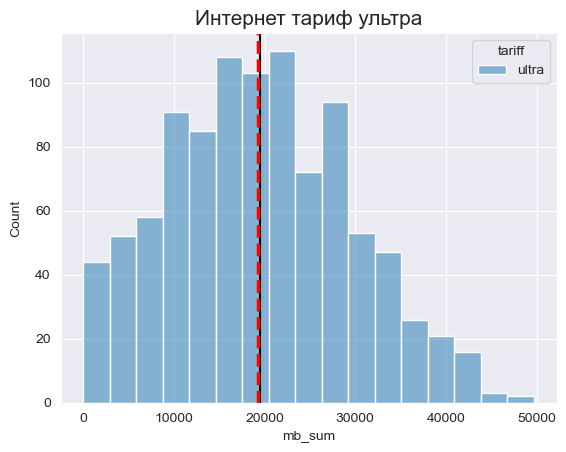

In [92]:
#посмотрим сколько интернета использует тариф ультра 
sns.histplot(data=ultra, x='mb_sum', hue='tariff', alpha=0.5)
plt.axvline(x=ultra['mb_sum'].mean(),color='black', lw=1.5)
plt.axvline(x=ultra['mb_sum'].median(),color='red',ls='--', lw=2.5)
plt.title('Интернет тариф ультра', fontsize=15)
plt.show()

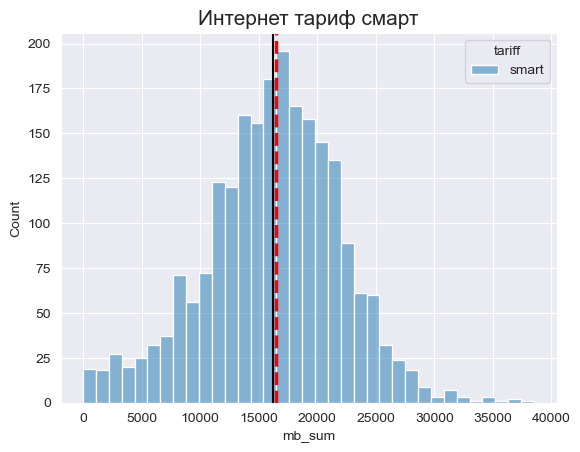

In [93]:
#посмотрим сколько интернета использует тариф смарт 
sns.histplot(data=smart, x='mb_sum', hue='tariff', alpha=0.5)
plt.axvline(x=smart['mb_sum'].mean(),color='black', lw=1.5)
plt.axvline(x=smart['mb_sum'].median(),color='red',ls='--', lw=2.5)
plt.title('Интернет тариф смарт', fontsize=15)
plt.show()

**Вывод:**
1. Тариф Ультра - в среднем используют примерно 20gb интернета в месяц, что в рамках тарифа, небольшое кол-во пользователей, выходит за рамки тарифа
2. Тариф Смарт -  в среднем используют примерно 16gb интернета в месяц, немного превышая тарифный план, так же достаточное кол-во людей, превышающее рамки тарифа
- Пользователи тарифа Ультра в среднем больше используют интернет чем пользователи Смарт, в целом можно сказать что пользователям Смарт больше покупают доп гигабайты

In [94]:
#функция которая посчитает дисперсию и стандартное отклонение для столбцов
def std(col):
    print(f'Дисперсия столбца {col}:',round(np.var(df[col]),2),f'\nСтандартное отклонение столбца {col}:', 
          round(np.std(df[col]),2))         

In [95]:
#столбец sum_duration
std('sum_duration')

Дисперсия столбца sum_duration: 58502.23 
Стандартное отклонение столбца sum_duration: 241.87


In [96]:
#столбец sum_duration
std('count_messages')

Дисперсия столбца count_messages: 1306.29 
Стандартное отклонение столбца count_messages: 36.14


In [97]:
#столбец mb_sum
std('mb_sum')

Дисперсия столбца mb_sum: 57191316.14 
Стандартное отклонение столбца mb_sum: 7562.49


****

## 4. Проверьте гипотезы
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [98]:
#посчитаем значения
df['city'].value_counts()

Москва             611
Санкт-Петербург    270
Новосибирск         98
Уфа                 95
Краснодар           86
                  ... 
Сургут               6
Нижневартовск        6
Химки                5
Кемерово             5
Иваново              2
Name: city, Length: 76, dtype: int64

In [99]:
#функция категоризирующая по 3 значениям
def city(value):
    if value == 'Москва':
        return 'Москва'
    if value == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    else:
        return 'Провинция'

In [100]:
#применим функцию к столбцу
df['cat_city'] = df['city'].apply(city)

In [101]:
#проверим
df.head()

,user_id,count_duration,sum_duration,count_messages,mb_sum,age,churn_date,city,first_name,last_name,...,rub_per_message,rub_per_minute,above_sms,above_min,above_mbs,income_sms,income_mbs,income_min,total,cat_city
0,1000,22.00,159.00,22.00,2252.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1,1,-978.00,-2841.00,-28468.00,0.00,0,0.00,1950.00,Провинция
1,1000,43.00,172.00,60.00,23213.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1,1,-940.00,-2828.00,-7507.00,0.00,0,0.00,1950.00,Провинция
2,1000,47.00,340.00,75.00,13988.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1,1,-925.00,-2660.00,-16732.00,0.00,0,0.00,1950.00,Провинция
3,1000,52.00,408.00,81.00,14043.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1,1,-919.00,-2592.00,-16677.00,0.00,0,0.00,1950.00,Провинция
4,1000,58.00,466.00,57.00,14556.00,52,NaT,Краснодар,Рафаил,Верещагин,...,1,1,-943.00,-2534.00,-16164.00,0.00,0,0.00,1950.00,Провинция


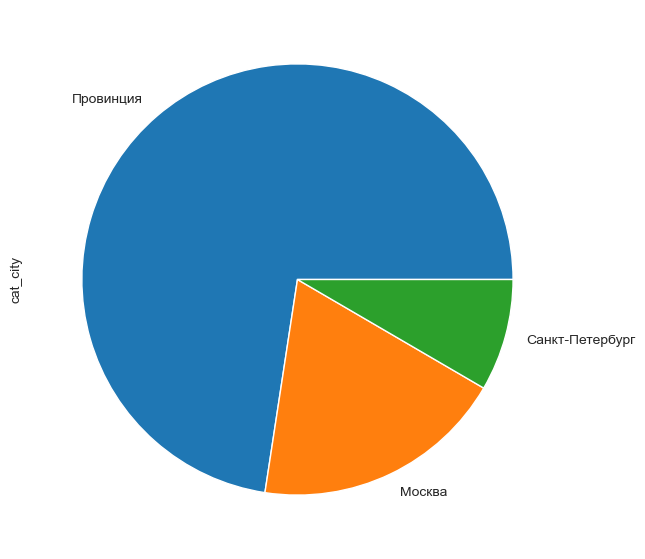

In [102]:
#посмотрим на распределение пользователей после категоризации
df['cat_city'].value_counts().plot(kind='pie', figsize=(10,7));

$H_0$ - **Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны**

$H_1$ - **Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

In [103]:
#срез по тарифам, вернет значения столбца доходов
samp_u = df[df['tariff'] == 'ultra']['total']
samp_s = df[df['tariff'] == 'smart']['total']

In [104]:
#посмотрим дисперсию
print('Дисперсия для среза по тарифу ультра:',np.var(samp_u))
print('Дисперсия для среза по тарифу смарт:',np.var(samp_s))

Дисперсия для среза по тарифу ультра: 140239.8928083661
Дисперсия для среза по тарифу смарт: 666410.6963391479


In [105]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(samp_u, samp_s,equal_var = False)#параметр, задающий, считать ли равными дисперсии выборок

print('p-value:',results.pvalue)
print('p-value format:{:5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(results)

p-value: 8.40789217310225e-253
p-value format:0.000000
Отвергаем нулевую гипотезу
Ttest_indResult(statistic=37.25823292143259, pvalue=8.40789217310225e-253)


****

$H_0$ - **Средняя выручка пользователей пользователей из Москвы равна выручке пользователей из других регионов**

$H_1$ - **Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

In [106]:
#2 среза,значения столбца доход,один для доходов от Москвы, другой для других городов, 
samp_mos = df[df['cat_city'] == 'Москва']['total']
samp_prov = df[df['cat_city'] != 'Москва']['total']

In [107]:
#посмотрим дисперсию
print('Дисперсия для среза по Москве:',np.var(samp_mos))
print('Дисперсия для среза по другим городам:',np.var(samp_prov))

Дисперсия для среза по Москве: 564856.1190503637
Дисперсия для среза по другим городам: 651935.9237087037


In [108]:
alpha = .05 # критический уровень статистической значимости

res = st.ttest_ind(samp_mos, samp_prov,equal_var = False)

print('p-value:',res.pvalue)
print('p-value format:{:2%}'.format(res.pvalue))
if res.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(res)

p-value: 0.517656692853026
p-value format:51.765669%
Не получилось отвергнуть нулевую гипотезу
Ttest_indResult(statistic=0.647198823534436, pvalue=0.517656692853026)


**Вывод**
- Использовали ttest_ind - для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
1. `Гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются`
- Из полученных данных можно предположить что средние выручки между пользователями действительно различаются, так как вероятность того что средние доходы сопоставимы 0.0 миллионной, т.е стремится к нулю,так же можно обратить внимание на статистику разности в данном тесте, 36 стандартных отклонений, это значит что средние значения выборок из выборки находятся в большом диапазоне друг относительно друга(Если я правильно понял этот момент), т.к по правилу 3 сигм 99% значений находятся в +\- 3 стандартных отклонениях от среднего. Не отвергаем гипотезу.
****
2. `Гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов`
- Из полученных данных можно предположить с уверенностью 51% что средняя выручка от пользователей из Москвы, не отличается от пользователей из других регионов, так же статистика разности говорит о том, что разница между средними выборок менее 1 стандартного отклонения.Отвергаем гипотезу.

### Общий вывод:
1. Руководителям компании стоит подумать над оптимизацией тарифа Ультра, чтобы сократить разницу в доход от этих двух тарифов, или усреднить 2 тарифа, например в smart+
- Ежемесячная плата: 1250 рублей
- Включено 1000 минут разговора, 200 сообщений и 20 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 2 рубля
- сообщение: 2 рубля
- 1 Гб интернет-трафика: 100 рублей
2. Так же помнить про регионы, ведь гипотеза о различии в доходах не подтвердилась
****
- Пользователи тарифа Ультра в среднем разговаривают дольше пользователей тарифа Смарт
- Пользователи тарифа Смарт в больше отправляют смс чем пользователи Ультра, в целом можно сказать что оба тарифа мало используют смс как способ общения
- Пользователи тарифа Ультра в среднем больше используют интернет чем пользователи Смарт, в целом можно сказать что пользователям Смарт больше покупают доп гигабайты